<h1 align="center"><font size = 8>Machine Learning | 2024 </font></h1>
<br>
<h2 align="center"><font size = 6  color="darkblue"> Logistic Regression </font></h2>
<h3 align="center">Abdulrahman Nourzad</h3>
<h4 align="center">Master's in Computer Software Engineering & Post DBA in Business Intelligence</h4>
<br>
<br>
<br>
<br>
<br>

## Project 3: Classification of cancer types with Logistic Regression algorithm

# Description:
<strong>Logistic Regression</strong> is a supervised machine learning algorithm mainly used for binary classification where we use a logistic function, also known as a sigmoid function that takes input as independent variables and produces a probability value between 0 and 1. For example, we have two classes Class 0 and Class 1 if the value of the logistic function for an input is greater than 0.5 (threshold value) then it belongs to Class 1 it belongs to Class 0. It’s referred to as regression because it is the extension of linear regression but is mainly used for classification problems. The difference between linear regression and logistic regression is that linear regression output is the continuous value that can be anything while logistic regression predicts the probability that an instance belongs to a given class or not.

<strong>Breast Cancer</strong> is the most common cancer among women in the world and accounts for 25% of all cancer cases. Breast cancer is a cancer that originates from breast tissue.It begins when breast cells begin to grow out of control. These cells usually form tumors that can be seen on an X-ray or felt as lumps in the breast area. Symptoms of breast cancer may include a lump in the breast, changes in the shape of the breast, dimpling of the skin, milk discharge, discharge from the nipple, a newly inverted nipple, or red or scaly patches of skin. There may be bone pain, swollen lymph nodes, shortness of breath or yellowing of the skin.
The main diagnostic challenges are how to classify tumors as malignant (cancerous) or benign (non-cancerous).
We want to classify these tumors using a machine learning algorithm (logistic regression) on the breast cancer dataset.

### About Dataset:
#### Shape of the breast cancer dataset:
This dataset involves 31 columns and 569 records.

#### The breast cancer dataset includes the following columns:
diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst.

# Objective: 
<ol>1. Build classification model with Logistic Regression to predict whether the cancer type is Malignant or Benign.</ol>
<ol>2. fine-tune the hyperparameters & evaluation metrics of model. </ol>

# Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Read Data

In [2]:
data = pd.read_csv('Breast_Cancer.csv')

# Step 3: Data Overview

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Remove unnecessary columns
data.drop(['id', 'Unnamed: 32'], axis = 1, inplace=True)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
data.shape

(569, 31)

In [7]:
# Get info of dataset and check missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Result:
#### count of columns: 31
#### count of records:  569
#### The dataset does not include any null or missing values so there won't be any need for data wrangling (dealing with missing values).

# Step 4: Data Analysis & Visualization

In [8]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

### Result: 
#### 1 = malignant (cancerous)
count of malignants: 212 records
#### 0 = benign (non-cancerous)
count of benign: 357 records

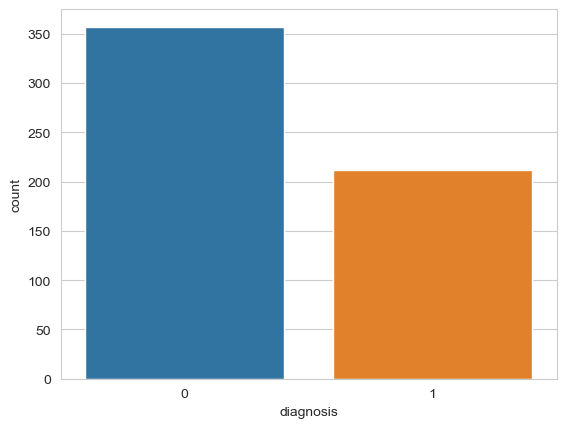

In [9]:
# Set the style of the plots
sns.set_style("whitegrid")

sns.countplot(data=data, x='diagnosis')
plt.show()

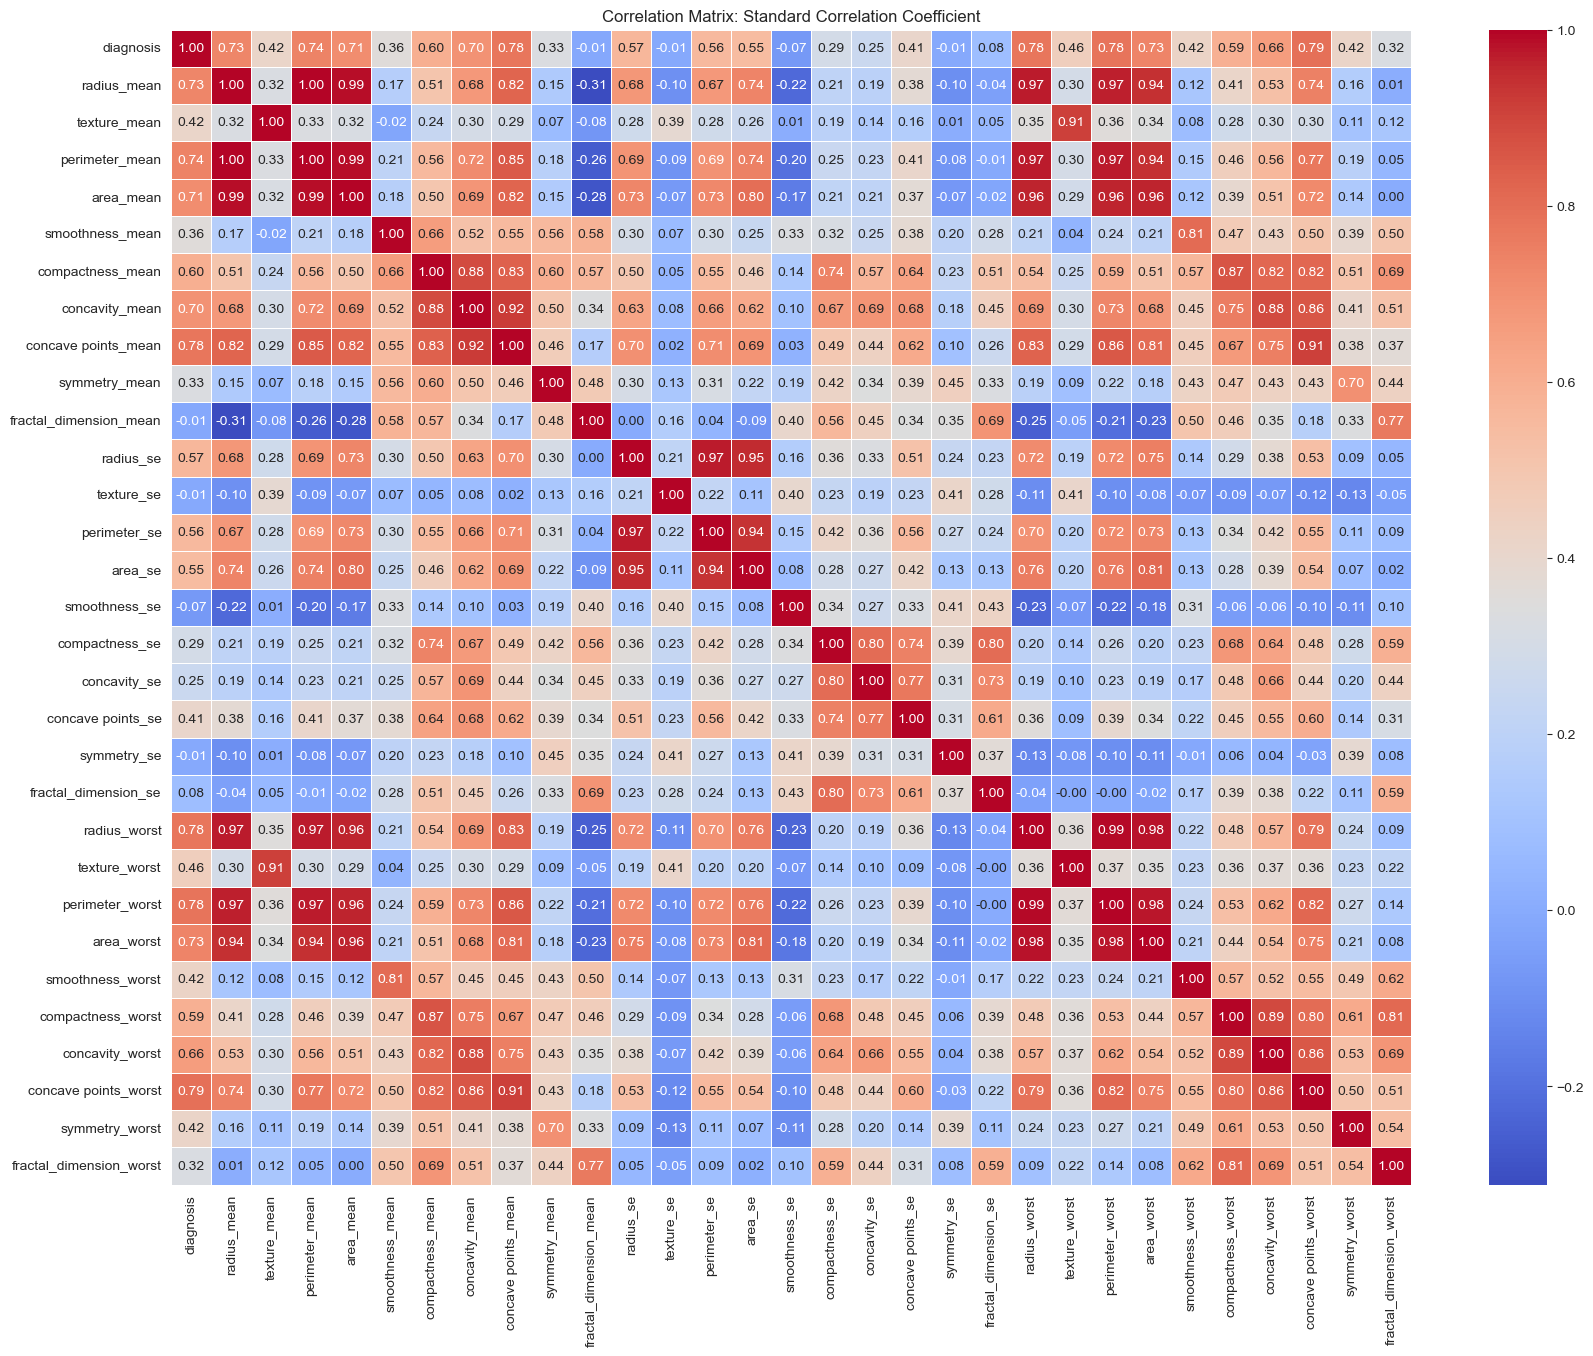

In [10]:
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix: Standard Correlation Coefficient')
plt.show()

In [11]:
corr = data.corr()['diagnosis']
corr.sort_values(ascending=False).round(4)

diagnosis                  1.0000
concave points_worst       0.7936
perimeter_worst            0.7829
concave points_mean        0.7766
radius_worst               0.7765
perimeter_mean             0.7426
area_worst                 0.7338
radius_mean                0.7300
area_mean                  0.7090
concavity_mean             0.6964
concavity_worst            0.6596
compactness_mean           0.5965
compactness_worst          0.5910
radius_se                  0.5671
perimeter_se               0.5561
area_se                    0.5482
texture_worst              0.4569
smoothness_worst           0.4215
symmetry_worst             0.4163
texture_mean               0.4152
concave points_se          0.4080
smoothness_mean            0.3586
symmetry_mean              0.3305
fractal_dimension_worst    0.3239
compactness_se             0.2930
concavity_se               0.2537
fractal_dimension_se       0.0780
symmetry_se               -0.0065
texture_se                -0.0083
fractal_dimens

### Results:
Target variable is diagnosis. <br/>
It seems that there is a good and strong positive relationship between the diagnosis variable and the following variables listed in order of correlation coefficient:
<br/>
concave points_worst:  &ensp;      0.7936 <br/>
perimeter_worst:    &ensp;        0.7829 <br/>
concave points_mean:   &ensp;     0.7766 <br/>
radius_worst:        &ensp;       0.7765 <br/>
perimeter_mean:    &ensp;         0.7426 <br/>
area_worst:        &ensp;         0.7338 <br/>
radius_mean:       &ensp;         0.7300 <br/>
area_mean:          &ensp;        0.7090 <br/>

# Step 5: Determine the Features & Target Variable

In [12]:
X = data.drop('diagnosis', axis = 1)   #Features

y = data['diagnosis'] #Target

In [13]:
X.shape

(569, 30)

In [14]:
y.shape

(569,)

# Step 6: Split the Dataset to Train & Test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X_train.shape

(398, 30)

In [17]:
X_test.shape

(171, 30)

# Step 7: Scaling the Features

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X_train)

StandardScaler()

In [20]:
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Step 8: Train the Model

In [21]:
model = LogisticRegression()

In [22]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [23]:
model.coef_

array([[ 0.36151014,  0.36590894,  0.31610122,  0.41880063,  0.18212827,
        -0.62679803,  0.74987144,  1.11026184, -0.21782944, -0.13788028,
         1.24254311, -0.15541981,  0.60518674,  0.87138493,  0.17738092,
        -0.59728543,  0.08110875,  0.47494075, -0.50330967, -0.69838981,
         0.8138174 ,  1.2879328 ,  0.53402497,  0.78196751,  0.50440415,
        -0.11569862,  0.97693569,  0.79835894,  1.19944887,  0.10073636]])

In [24]:
model.intercept_

array([-0.44233222])

# Step 9: Predicting Test Data

In [25]:
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

# Step 10: Evaluating the Model

In [26]:
cm = confusion_matrix(y_test, y_pred)
print("confusion_matrix for model :\n", cm)

confusion_matrix for model :
 [[106   2]
 [  1  62]]


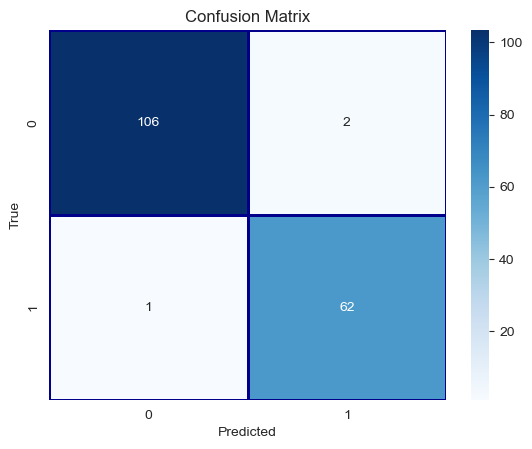

In [27]:
sns.heatmap(cm, annot = True, cmap='Blues', fmt='.0f', robust=True, linecolor='darkblue', linewidths=1)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Results: <br/>
    &ensp;&ensp;TP = &ensp;106 <br/>
    &ensp;&ensp;TN = &ensp;62  <br/>
    &ensp;&ensp;FP = &ensp;2   <br/>
    &ensp;&ensp;FN = &ensp;1   <br/>
    
    

In [28]:
print("accuracy:\t", (accuracy_score(y_test, y_pred)*100).round(2), "%")
print("precision:\t", (precision_score(y_test, y_pred)*100).round(2), "%")
print("recall: \t", (recall_score(y_test, y_pred)*100).round(2), "%")
print("f1_score:\t", (f1_score(y_test, y_pred)*100).round(2), "%")

accuracy:	 98.25 %
precision:	 96.88 %
recall: 	 98.41 %
f1_score:	 97.64 %


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [30]:
log_loss(y_test, y_pred).round(4)

0.6323

<strong>Log loss</strong> is a metric evaluating classification model performance by measuring the disparity between predicted and actual probabilities. Rooted in information theory, it penalizes deviations, offering a continuous metric for optimization during model training. Lower log loss values signify better alignment between predicted and actual outcomes, making it a valuable tool for assessing the accuracy of probability estimates in classification problems.

### Using ROC curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. The ROC curve is a graph of the specificity vs sensitivity i.e specificity is the % actual negatives correctly predicted and sensitivity being the % actual positives correctly predicted.

The ROC curve is the plot of the true positive rate (TPR) against the false positive rate (FPR) at each threshold setting.

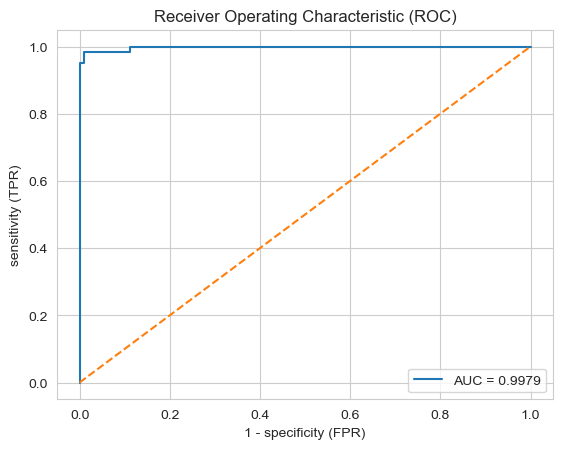

In [31]:
import sklearn.metrics as metrics

y_pred_proba = model.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('1 - specificity (FPR)')
plt.ylabel('sensitivity (TPR)')
plt.show()

### Result:

#### All of the metric calculations show good scores which means that our Logistic Regression model is good.
#### specially, Accuracy is 98.25% and  AUC is excellent score (99.79%) based on the figure below.

<div style="align:center;"> <img src="Images/ROC.png" width="800" height="700"/> </div>

# done!